In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [17]:
sessions = pd.read_csv("backups/mturk_sessions_2019-07-25.csv")

In [18]:
surveyKeys = {"Gender":    "<strong>Your Gender:</strong>",
              "Age":       "<strong>Your Age:</strong>",
              "Ethnicity": "<p><strong>Your Ethnicity</strong><br />(Please copy and paste one item into the following text box)<ul style='display:inline-block;'><li>Hispanic</li><li>Not Hispanic</li><li>Other</li></ul></p>",
              "Race":      "<p><strong>Your Race:</strong><br />(Please copy and paste one item into the following text box)<ul style='display:inline-block;'><li>American Indian / Alaksan Native</li><li>Asian / Asian American</li><li>Black / African American</li><li>Native Hawaiian / Other Pacific Islander</li><li>White</li><li>Multi</li><li>Other</li></ul></p>",
              "Feedback":  "Feedback on this Task:"}
surveyData = pd.DataFrame(index = ["SeshID"], columns = surveyKeys.keys())
sessions["ExitSurvey"] = sessions["ExitSurvey"].replace(np.nan, "")
for idx, row in sessions.iterrows():
    try:
        thisSurvey = row["ExitSurvey"]
        if thisSurvey:
            surveyObj = json.loads(str(thisSurvey))
            surveyParsed = {"SeshID": row["SeshID"]}
            for shortName, longName in surveyKeys.items():
                surveyParsed[shortName] = surveyObj[longName]
            surveyData = surveyData.append(surveyParsed, ignore_index = True)
    except:
        print("Error parsing: ", idx)
mergedData = sessions.merge(right = surveyData, how = "inner", on = "SeshID").set_index("SeshID").drop("ExitSurvey", axis = 1)

In [19]:
mergedData["Feedback"].map(print)



This was really fun, I wish I could have heard what she was saying because it looked like it would be funny to listen too. 



This one was rather enjoyable.
It was an inspiring narrative
none
Great story! thanks for sharing.
I enjoyed this very much. This was a great HIT!

Interesting and enjoyable
Wow
I thought it was good. I had a nice laugh.
That story was absolutely riveting and touching and that guy is an amazing storyteller.



This was probably the most fun HIT I've ever done.
Very emotional and the saddest 5 dollars I've ever made
It was a roller coaster
None
enjoyed it was funny

Fun task! Thank you!


This story made me actually tear up thinking about this happening to my dog.
What an emotional video. That was brutal. Really feel for that man. Sounds like absolute hell.
Who was she? That was funny!
Thanks for the survey. It was a funny video.

This was great task! 
This video was extremely hard to watch.  I really wanted the child to pull through.  
This was an interesting

SeshID
3767    None
3768    None
3769    None
3770    None
3772    None
3773    None
3774    None
3775    None
3776    None
3777    None
3778    None
3779    None
3780    None
3781    None
3782    None
3783    None
3784    None
3785    None
3786    None
3787    None
3788    None
3789    None
3791    None
3792    None
3793    None
3794    None
3795    None
3796    None
3797    None
3798    None
        ... 
5565    None
5566    None
5567    None
5568    None
5569    None
5570    None
5571    None
5573    None
5574    None
5575    None
5578    None
5579    None
5580    None
5581    None
5582    None
5583    None
5584    None
5585    None
5586    None
5587    None
5588    None
5589    None
5590    None
5591    None
5592    None
5593    None
5594    None
5595    None
5596    None
5597    None
Name: Feedback, Length: 1727, dtype: object

In [20]:
mergedData.mean()

StartTime     1.563800e+09
Duration      1.443997e+03
NumRatings    1.138043e+01
dtype: float64

In [13]:
mergedData["Gender"] = mergedData["Gender"].apply(lambda x: x[0].upper() if x else "")

In [16]:
mergedData.to_csv("backups/mturk_demo_2019-07-25.csv")

In [21]:
mergedData.shape

(1727, 9)

In [22]:
mergedData.groupby("WorkerID").count()["StartTime"].mean()

1.409795918367347

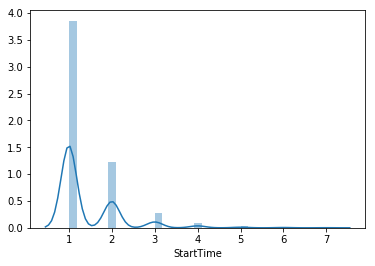

In [23]:
sns.distplot(mergedData.groupby("WorkerID").count()["StartTime"])